In [ ]:
!nvidia-smi

Fri Dec 11 10:30:33 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.45.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install tensorflow-gpu

     |████████████████████████████████| 320.4MB 55kB/s 


In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

In [ ]:
import tensorflow as tf

In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# change the permission
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Dowloading th dataset from Kaggle 
!kaggle datasets download -d gpiosenka/100-bird-species # Dowloading th dataset from Kaggle 

100-bird-species.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip 100-bird-species.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/SUPERB STARLING/093.jpg  
  inflating: train/SUPERB STARLING/094.jpg  
  inflating: train/SUPERB STARLING/095.jpg  
  inflating: train/SUPERB STARLING/096.jpg  
  inflating: train/SUPERB STARLING/097.jpg  
  inflating: train/SUPERB STARLING/098.jpg  
  inflating: train/SUPERB STARLING/099.jpg  
  inflating: train/SUPERB STARLING/100.jpg  
  inflating: train/SUPERB STARLING/101.jpg  
  inflating: train/SUPERB STARLING/102.jpg  
  inflating: train/SUPERB STARLING/103.jpg  
  inflating: train/SUPERB STARLING/104.jpg  
  inflating: train/SUPERB STARLING/105.jpg  
  inflating: train/SUPERB STARLING/106.jpg  
  inflating: train/SUPERB STARLING/107.jpg  
  inflating: train/SUPERB STARLING/108.jpg  
  inflating: train/SUPERB STARLING/109.jpg  
  inflating: train/SUPERB STARLING/110.jpg  
  inflating: train/SUPERB STARLING/111.jpg  
  inflating: train/SUPERB STARLING/112.jpg  
  inflating: train/SUPERB STARLING/113.jpg  
  in

In [ ]:
from glob import glob

In [ ]:
len(glob('/content/train/*'))

230

In [ ]:
import numpy as np
import os
from tensorflow.keras.models import load_model, Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, BatchNormalization, Dropout, Flatten, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, LearningRateScheduler, ModelCheckpoint
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline

# Visualize the Dataset

---



In [ ]:
sample_batchsize = 64

In [ ]:
sample_gen = ImageDataGenerator(rescale=1/255)
samaple_dataset = sample_gen.flow_from_directory('/content/train', batch_size=sample_batchsize)

Found 32025 images belonging to 230 classes.


In [ ]:
class_list = list(samaple_dataset.class_indices.keys())

In [ ]:
print(len(class_list))

230


In [ ]:
images, labels = next(iter(samaple_dataset))

In [ ]:
print(images.shape, labels.shape)

(64, 256, 256, 3) (64, 225)


In [ ]:
def show_images(num_of_images):
  if num_of_images < sample_batchsize:
    fig, ax = plt.subplots(1, num_of_images, figsize=(20, 20))
    for i in range(num_of_images):
      label = class_list[np.argmax(labels[i], axis = 0)]
      ax[i].imshow(images[i])
      ax[i].set_title(label)
      ax[i].set_xticks([])
      ax[i].set_yticks([])
  else:
    print('Enter the number less than batch size otherwise change the batch size as required')

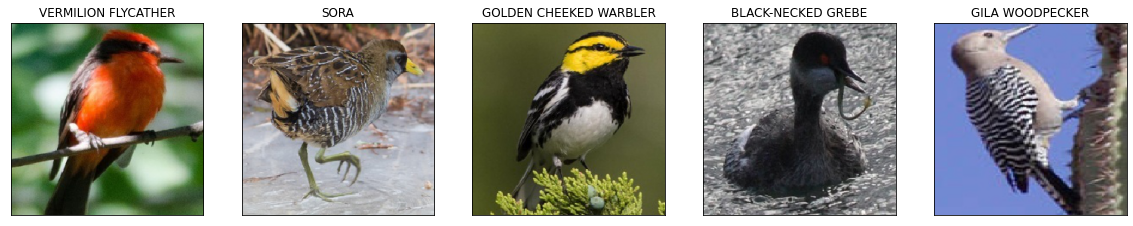

In [ ]:
show_images(5)

# Import and prepare the dataset

In [ ]:
train_path ='/content/train'
valid_path = '/content/valid'
test_path = '/content/test'
Img_size = [224, 224]
batch_size = 256

In [ ]:
## Data Augmentation

train_generator =ImageDataGenerator(rescale = 1/255,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   zoom_range=0.2,
                                   shear_range=0.2,
                                   rotation_range=30,
                                   fill_mode='nearest')
valid_generator = ImageDataGenerator(rescale= 1/255)
test_generator = ImageDataGenerator(rescale = 1/ 255)

In [ ]:
# Dataset 

train_datset = train_generator.flow_from_directory(directory=train_path,
                                                   target_size= Img_size,
                                                   class_mode = 'sparse',
                                                   batch_size = batch_size,
                                                   color_mode = 'rgb', )

valid_datset = train_generator.flow_from_directory(directory=valid_path,
                                                   target_size= Img_size,
                                                   class_mode = 'sparse',
                                                   batch_size = batch_size,
                                                   color_mode = 'rgb', )

test_datset = train_generator.flow_from_directory(directory=test_path,
                                                   target_size= Img_size,
                                                   class_mode = 'sparse',
                                                   batch_size = batch_size,
                                                   color_mode = 'rgb', )

Found 31316 images belonging to 225 classes.
Found 1125 images belonging to 225 classes.
Found 1125 images belonging to 225 classes.


# Build a Model

In [ ]:
# now here we will try Inception net

from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2

In [ ]:
 base_model = InceptionResNetV2(include_top=False, input_shape=Img_size +[3], weights='imagenet')

219062272/219055592 [==============================] - 2s 0us/step


In [ ]:
base_model.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
________________________________________________________________________________

In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
base_model.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
________________________________________________________________________________

In [ ]:
# Adding additional layers to the model. Can try out with different experiments of adding more layers.

model=Sequential()
model.add(base_model)
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(2048,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1024,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(225,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Functio (None, 5, 5, 1536)        54336736  
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 1536)        0         
_________________________________________________________________
flatten (Flatten)            (None, 38400)             0         
_________________________________________________________________
batch_normalization_203 (Bat (None, 38400)             153600    
_________________________________________________________________
dense (Dense)                (None, 2048)              78645248  
_________________________________________________________________
batch_normalization_204 (Bat (None, 2048)              8192      
_________________________________________________________________
activation_203 (Activation)  (None, 2048)              0

In [ ]:
opt=tf.keras.optimizers.Adam(lr=0.001)

model.compile(loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],
              optimizer=opt)

## Add callbacks for saving the best model

In [ ]:
# Here Early stopping callback is added for unnecessary running of epochs if model performance is poor 
filepath = 'IRv2_model.h5'

earlystopping = EarlyStopping(monitor = 'val_accuracy', 
                              mode = 'max' , 
                              patience = 10,
                              verbose = 1)

# for saving best model till execution
checkpoint    = ModelCheckpoint(filepath, 
                                monitor = 'val_accuracy', 
                                mode='max', 
                                save_best_only=True, 
                                verbose = 1)

callback_list = [earlystopping, checkpoint]

In [ ]:
result = model.fit(train_datset, 
                   validation_data=valid_datset, 
                   epochs = 300,
                   callbacks = callback_list)
                    #verbose= 1)

Epoch 1/300
123/123 [==============================] - ETA: 0s - loss: 3.1289 - accuracy: 0.2989
Epoch 00001: val_accuracy improved from -inf to 0.57244, saving model to IRv2_model.h5
123/123 [==============================] - 395s 3s/step - loss: 3.1289 - accuracy: 0.2989 - val_loss: 1.5064 - val_accuracy: 0.5724
Epoch 2/300
123/123 [==============================] - ETA: 0s - loss: 1.8689 - accuracy: 0.5045
Epoch 00002: val_accuracy improved from 0.57244 to 0.71200, saving model to IRv2_model.h5
123/123 [==============================] - 390s 3s/step - loss: 1.8689 - accuracy: 0.5045 - val_loss: 1.0140 - val_accuracy: 0.7120
Epoch 3/300
123/123 [==============================] - ETA: 0s - loss: 1.5227 - accuracy: 0.5834
Epoch 00003: val_accuracy improved from 0.71200 to 0.74933, saving model to IRv2_model.h5
123/123 [==============================] - 391s 3s/step - loss: 1.5227 - accuracy: 0.5834 - val_loss: 0.8426 - val_accuracy: 0.7493
Epoch 4/300
123/123 [=========================

In [ ]:
## Download the best model saved in workspace
files.download('/content/IRv2_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Visualising the Loss, Accuracy


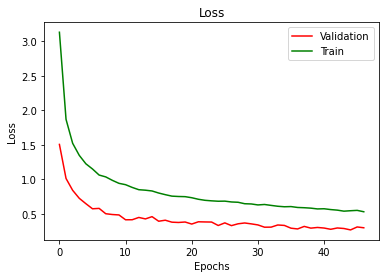

In [ ]:
## Visualize Loss
plt.plot(result.history['val_loss'], c = 'red', label = 'Validation')
plt.legend()
plt.plot(result.history['loss'], c = 'green', label = 'Train')
plt.legend()
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

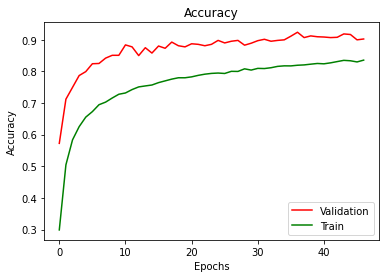

In [ ]:
## Visualize Accuracy

plt.plot(result.history['val_accuracy'], c = 'red', label = 'Validation')
plt.legend()
plt.plot(result.history['accuracy'], c = 'green', label = 'Train')
plt.legend()
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# Model Evaluation

In [ ]:
# The following Scalar values we are going to predict from Test data
model.metrics_names

['loss', 'accuracy']

In [ ]:
model.evaluate(test_datset)

5/5 [==============================] - 10s 2s/step - loss: 0.2461 - accuracy: 0.9200


[0.24611441791057587, 0.9200000166893005]

# Classify on Test data

In [ ]:
def test_output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    prediction=model.predict(img)
    score = tf.nn.softmax(prediction[0])
    print("This image most likely belongs to {} with a {:.2f} percent confidence."
              .format(class_list[np.argmax(score)], 100* np.max(prediction[0])))

This image most likely belongs to BLACK-THROATED SPARROW with a 97.08 percent confidence.


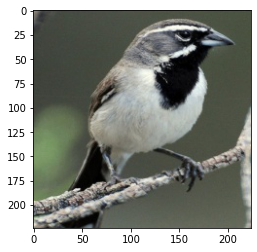

In [ ]:
test_img_path = '/content/test/BLACK-THROATED SPARROW/1.jpg'
test_output(test_img_path)
pic = load_img(test_img_path, target_size=Img_size+[3])
plt.imshow(pic)
plt.show()

This image most likely belongs to ALEXANDRINE PARAKEET with a 99.89 percent confidence.


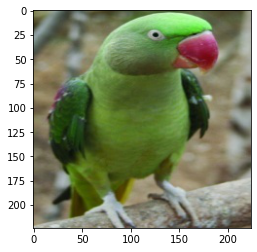

In [ ]:
# Try with another image
test_img_path_2 = '/content/test/ALEXANDRINE PARAKEET/1.jpg'
test_output(test_img_path_2)
pic = load_img(test_img_path_2, target_size=Img_size+[3])
plt.imshow(pic)
plt.show()